# Unsupervised Learning on Credit Approval Dataset

## Project Description and Objective
This project aims to predict whether credit card  will be approved for a customer or not based on their attributes. This will help bank to identify potential candidates for credit card approval and can help to identify most critical features that distinguish approved customers from non approved customers.

### Exploratory Data Analysis
In Machine Learning, understanding of data is most important factor as it helps to identify the properties of data and help to select the suitable machine learning techniques. It also help to identify and solve any issues in data prior to applying the ML techniques.
Exploratory data analysis will be performed on the datasets to analyze its features, their types and other important aspects of the dataset. It will also help to identify the issues with the dataset so they can be solved before applying machine learning techniques.

### Data Source & Description
This dataset was obtained from UCI Machine Learning repository and below is the information about dataset provided by the repository.
1. <b>Title</b>: Credit Approval

2. <b>Sources</b>: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  <b>Download link</b>:
    https://archive.ics.uci.edu/dataset/27/credit+approval
  
4.  <b>Relevant Information</b>:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
    
### Machine Learning Model
The objective in this project is to distinguish customer eligible for credit card approval from those who are not eligible. So we will be applying Unsupervised Learning (Clustering) for this task.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans,BisectingKMeans,SpectralClustering,MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from itertools import permutations
from sklearn.decomposition import NMF
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis & Data Preprocessing

In [2]:
df = pd.read_csv('credit approval.csv', na_values='?')
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [3]:
# Exploring dimensions of data
rows,cols=df.shape
print("No. of instances in data are",rows)
print("No. of features in data are",cols)

No. of instances in data are 690
No. of features in data are 16


In [4]:
# Types of features in data
df.dtypes


A1        object
A2       float64
A3       float64
A4        object
A5        object
A6        object
A7        object
A8       float64
A9        object
A10       object
A11        int64
A12       object
A13       object
A14      float64
A15        int64
Class     object
dtype: object

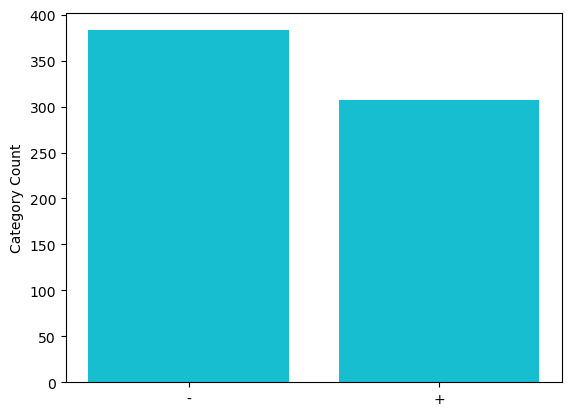

In [5]:
# Count Values belonging to each category
counts = df["Class"].value_counts()
plt.bar(counts.index, counts.values,color='#17becf')
plt.ylabel("Category Count")
plt.show()

### Basic Analysis of Data
We checked basic properties of data and here are the details
1. <b>No of rows</b>: There are 690 rows in the datasets
2. <b>No of columns</b>: Total features in the dataset are 16
3. <b>Class label</b>: Feature 'Class' is the class label with value'+' for customer approved for credit card and '-' for customers who are not approved.

#### Types of features
There are total 16 features in the dataset. 6 features are numerical and rest of them are categorical.

#### Class Distribution
We checked the class distribution and data looks fairly balanced. There are almost 350 instances for '+' class label and almost 300 instances for '-' class label.

In [6]:
# Missing values detection 
df.isnull().sum()

A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
Class     0
dtype: int64

In [7]:
# Replace missing values
# Replace A1 with mode and A2 and A14 with mean

missing_vals = df.isnull().sum()
types = df.dtypes
cols = df.columns
for i,m in enumerate(missing_vals):
    col=cols[i]
    if missing_vals[i]>0: 
        if types[i]=='object':
            df[col]=df[col].fillna(df[col].mode()[0])
        else:
            df[col]=df[col].fillna(df[col].mean())


### Missing Values Detection and Removal
We checked all features in the dataset for missing values. There are some features with missing values whose detail in provide below:

<b>Feature$\;\;\;\;\;\;$  No. of missing values</b>
1. A1$\;\;\;\;\;\;$12
2. A2$\;\;\;\;\;\;$12
3. A4$\;\;\;\;\;\;\;$6
4. A5$\;\;\;\;\;\;\;$6
5. A6$\;\;\;\;\;\;\;$9
6. A7$\;\;\;\;\;\;\;$9
7. A14$\;\;\;\;\;$13

It is important to impute missing values before performing any ML techniques. Since we have mixed features in our dataset we will use different techniques to impute missing values based on the type of the attributes.
1. <b> Numerical Attributes:</b> Mean value imputation is used to impute missing values for numerical features.
2. <b> Categorical Attributes:</b> Since mean value imputation cannot be performed on categorical features, we used mode to impute missing values for these features.

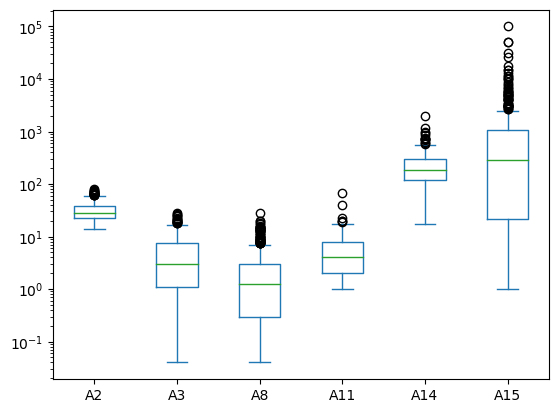

In [8]:
# Outlier Detection
df2=df.select_dtypes('number')
df2.mask(df2 == 0).plot.box()
plt.yscale('log')
numeric_cols=df2.columns.tolist()
plt.xticks(list(range(1,len(numeric_cols)+1)),numeric_cols)
plt.show()

In [9]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.853273,4.978163,3.346513,4.86294,172.159274,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [10]:
numeric_cols= df2.columns.tolist()

indices=[]
for c in numeric_cols:
    col=df2[[c]]
    q1 = np.nanquantile(col, 0.25)
    q1 = np.nanquantile(col, 0.5)
    q3 = np.nanquantile(col, 0.75)
    iqr_region = q3-q1
    upper_limit= q3+(1.5*iqr_region)
    lower_limit = q1-(1.5*iqr_region)
    df[c].fillna(0)
    ind=np.where(((df[c]>=lower_limit) & (df[c]<=upper_limit)) | (df[c]==0))[0]
    df=df.iloc[ind]
print(df.shape)

(420, 16)


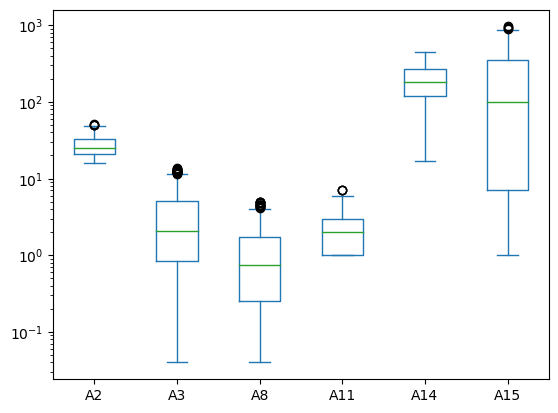

In [11]:
# Outlier Detection
df2=df.select_dtypes('number')
df2.mask(df2 == 0).plot.box()
plt.yscale('log')
numeric_cols=df2.columns.tolist()
plt.xticks(list(range(1,len(numeric_cols)+1)),numeric_cols)
plt.show()

In [12]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,27.375697,3.561000,1.052155,0.783333,170.381269,101.804762
std,8.106394,3.738551,1.195823,1.524097,111.969616,204.866252
min,15.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.170000,0.750000,0.125000,0.000000,100.000000,0.000000
50%,25.080000,2.000000,0.500000,0.000000,160.000000,0.000000
75%,32.330000,5.000000,1.585000,1.000000,240.000000,89.750000
max,50.750000,13.665000,5.000000,7.000000,440.000000,960.000000


### Outlier Detection & Removal
Box plots and using description of details of the features, we checked the outliers in the dataset. There are outliers in the dataset, and we used IQR method to remove the outliers. IQR is the range between the first and the third quartiles. Upper and lower ranges are defined as Q3 + 1.5 IQR and Q1 – 1.5 IQR respectively. Data points above upper limit and below lower limit are removed.

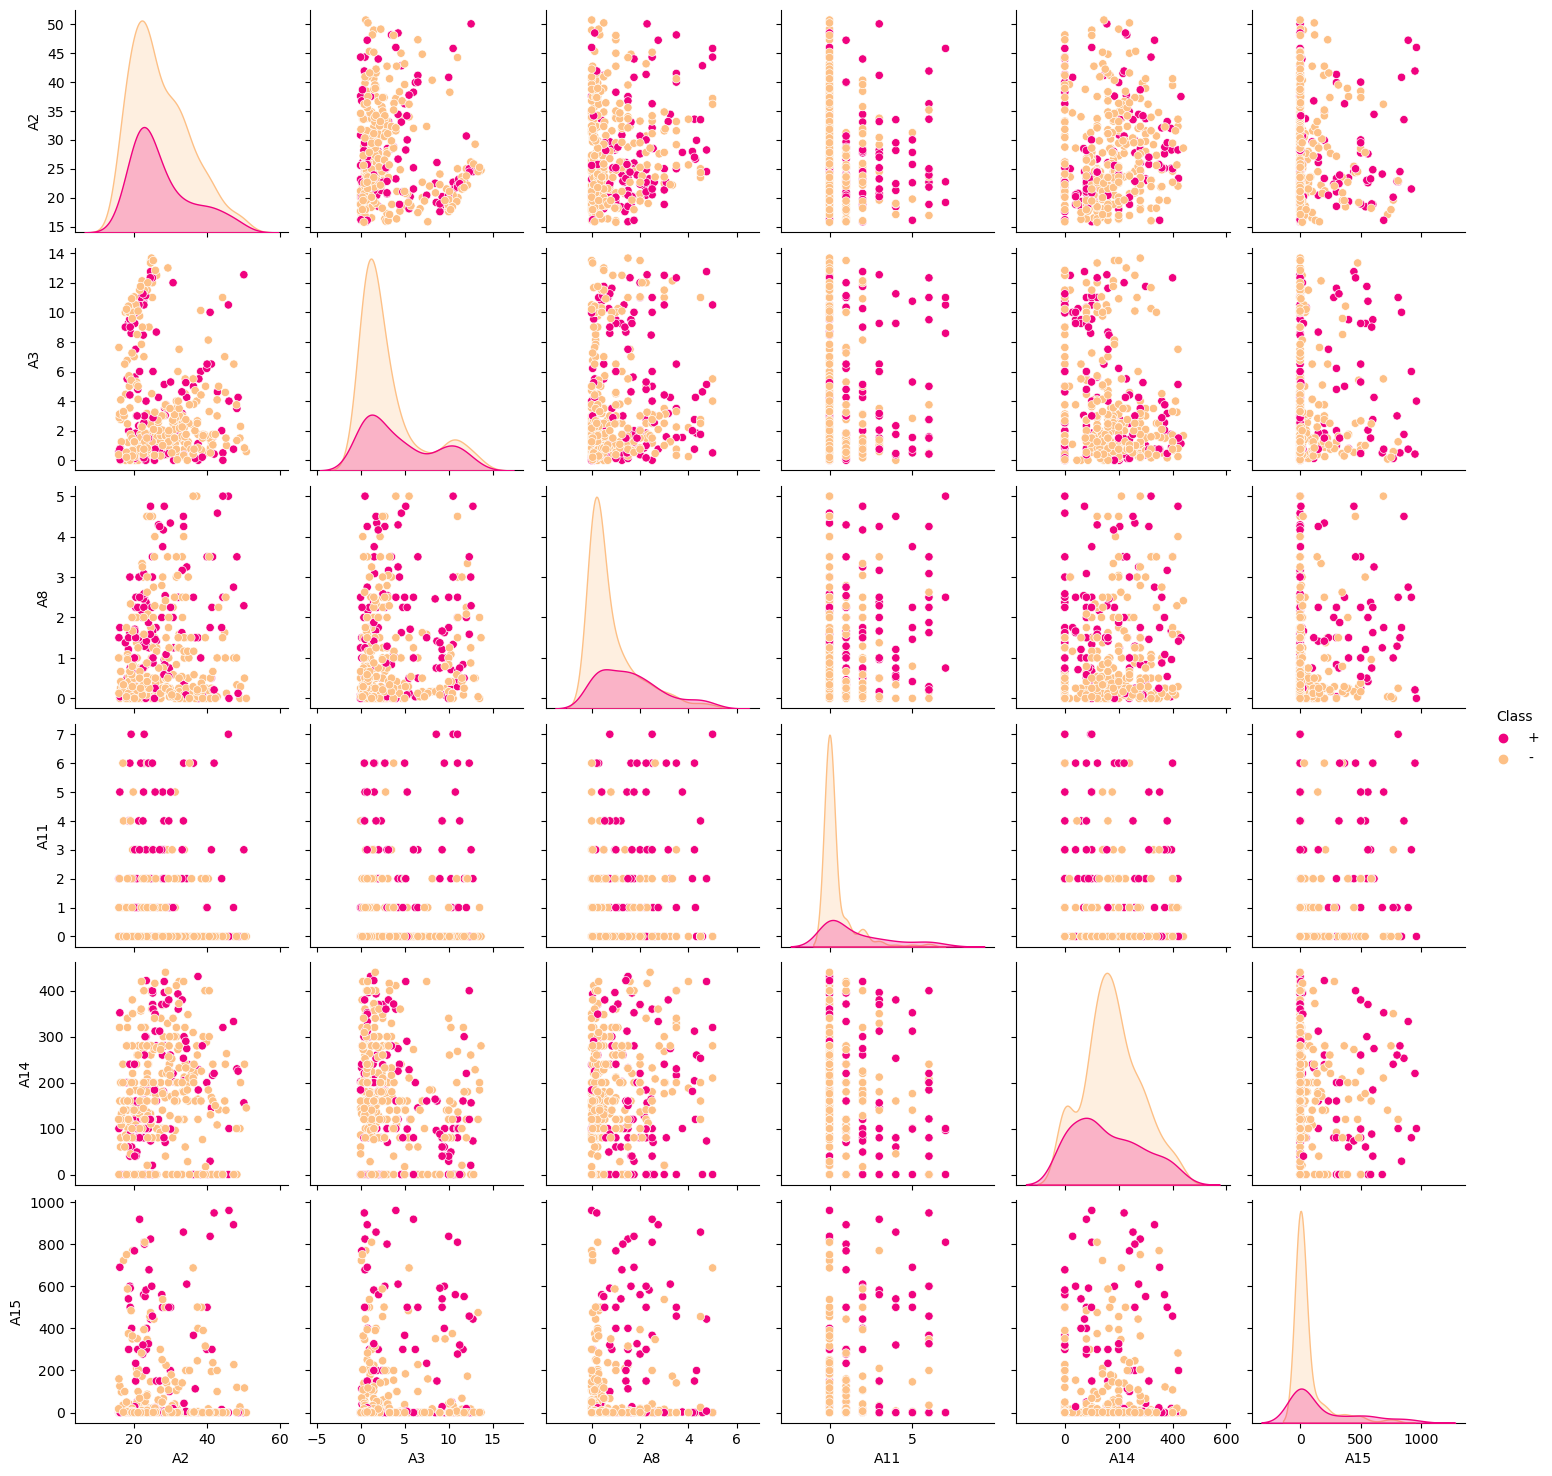

In [13]:
sns.pairplot(df, hue ='Class',palette='Accent_r')
plt.show()

### Relationship of Numerical Features
Pair plots are used to check the pairwise relationship of numerical features. The diagonal plots shows the distribution of class for that column. The colors in the plot represent the class label.
As we can see that class distribution in all columns are overlapped and also the scatter plot show that are mostly mixed. There are two features A11 and A15 which show isolation of classes to some extent. 

In [14]:
def plot_feature_distribution(feat):
    plot1 = plt.subplot2grid((3, 3), (0, 0), rowspan=1,colspan=2)
    plot2 = plt.subplot2grid((3, 3), (1, 0), rowspan=2,colspan=1)
    plot3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2,colspan=3)
    y=df[feat].value_counts().tolist()
    mylabels = set(set(df[feat]))
    
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    plot1.pie(y, labels = mylabels, shadow = False,colors=colors,autopct='%1.1f%%',)
    plot1.set_title('Ditribution of feature '+feat)
    
    y=df[feat].iloc[np.where(df['Class']=='+')[0]].value_counts().tolist()
    mylabels = set(df[feat].iloc[np.where(df['Class']=='+')[0]])
    
    
    plot2.pie(y, labels = mylabels, shadow = False,colors=colors,autopct='%1.1f%%',)
    plot2.set_title('Ditribution of feature '+feat+' for class \'+\'')

    y=df[feat].iloc[np.where(df['Class']=='-')[0]].value_counts().tolist()
    mylabels = set(df[feat].iloc[np.where(df['Class']=='-')[0]])
    plot3.pie(y, labels = mylabels, shadow = False,colors=colors,autopct='%1.1f%%',)
    plot3.set_title('Ditribution of feature '+feat+' for class \'-\'')

    plt.tight_layout()
    plt.show()

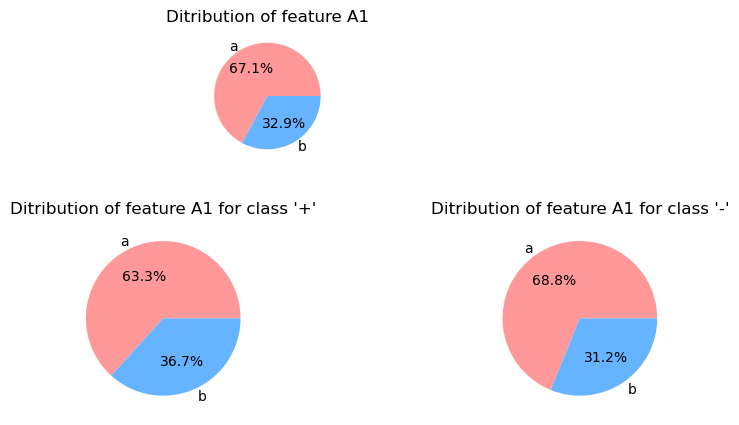

In [15]:
plot_feature_distribution('A1')

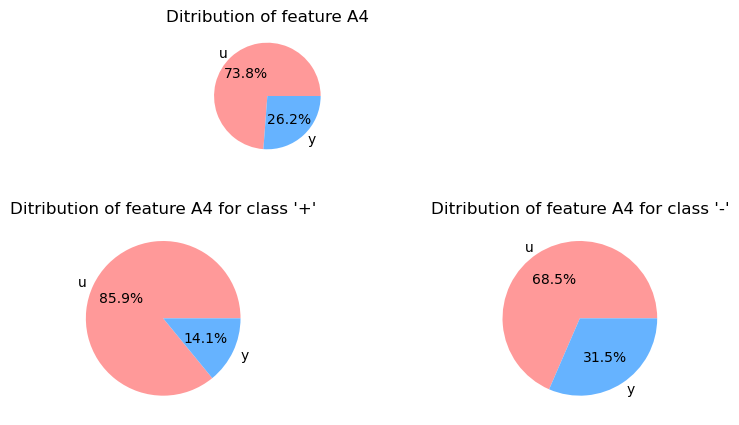

In [16]:
# A4, A5, A6, A7 ,A9, A10, A12, A13, A15 
plot_feature_distribution('A4')

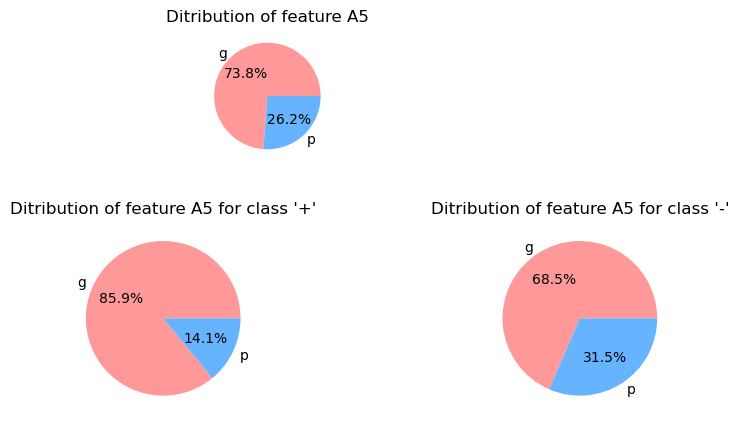

In [17]:
# A5, A6, A7 ,A9, A10, A12, A13, A15 
plot_feature_distribution('A5')

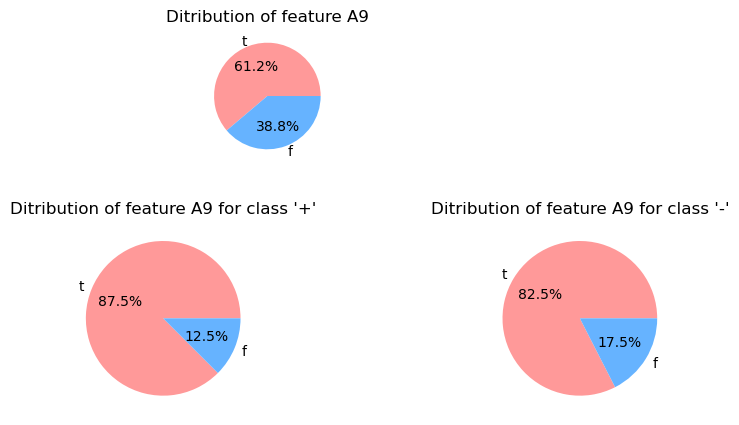

In [18]:
# A9
plot_feature_distribution('A9')

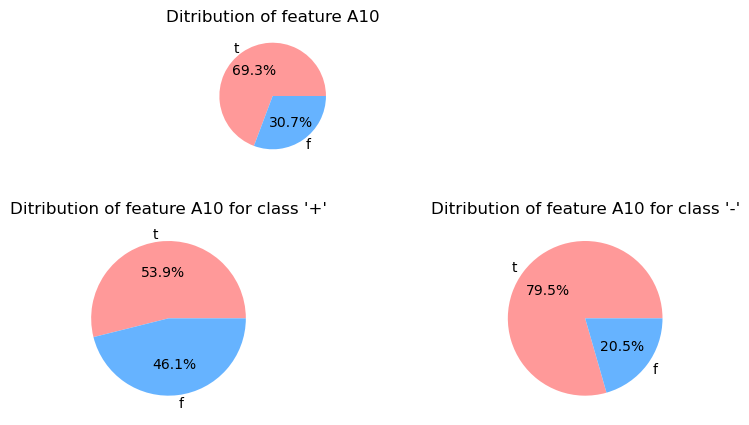

In [19]:
# A10
plot_feature_distribution('A10')

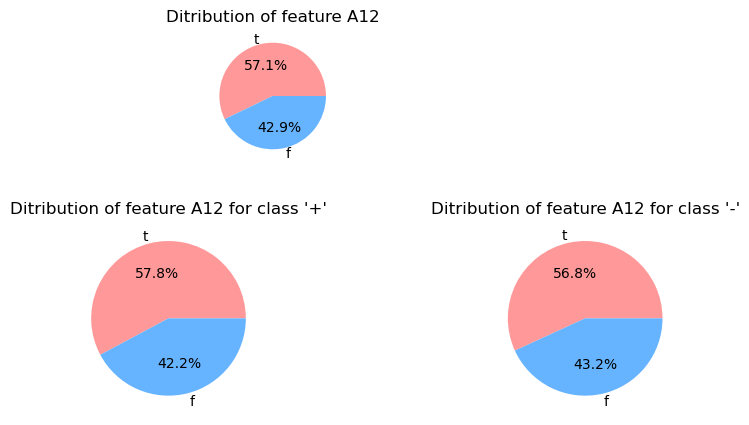

In [20]:
# A12
plot_feature_distribution('A12')

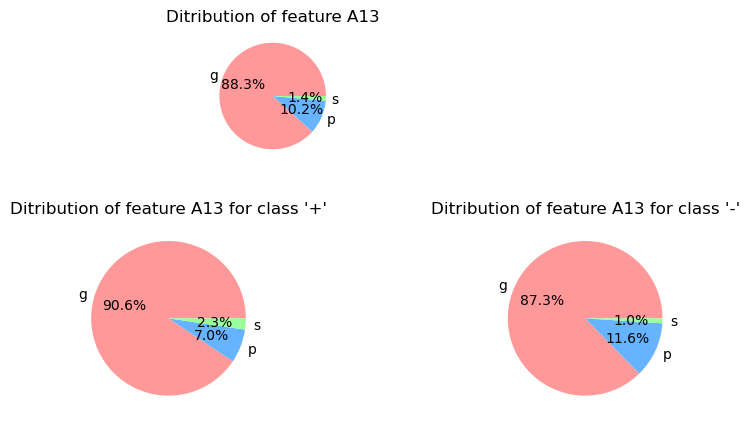

In [21]:
# A13
plot_feature_distribution('A13')

### Feature Distribution Analysis
Pie charts are used to check overall distribution of features in data and also class wise distribution of features is analyzed. Class wise distribution of feature A1, A13, A12 is almost similar as its overall distribution.Feature A4, A5, and A9 have somewhat different overall distribution than its class-wise distribution. 

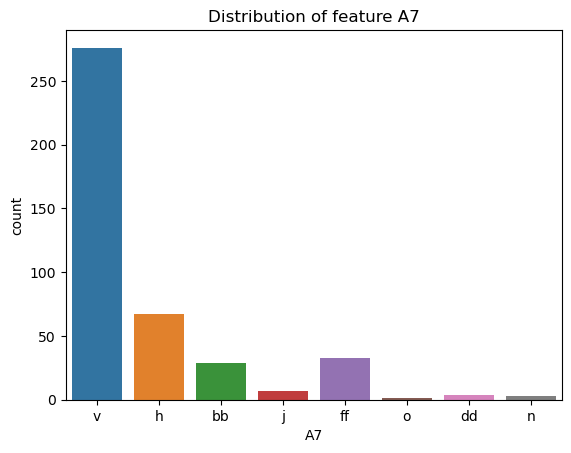

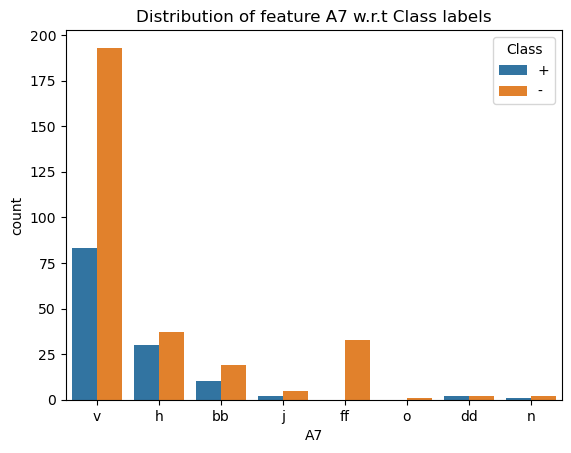

In [22]:
# A7
sns.countplot(x='A7', data=df)
plt.title('Distribution of feature A7')
plt.show()
sns.countplot(x='A7', hue='Class', data=df)
plt.title('Distribution of feature A7 w.r.t Class labels')
plt.show()

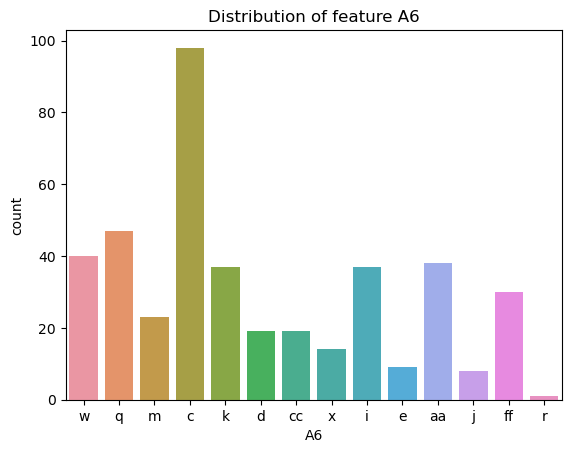

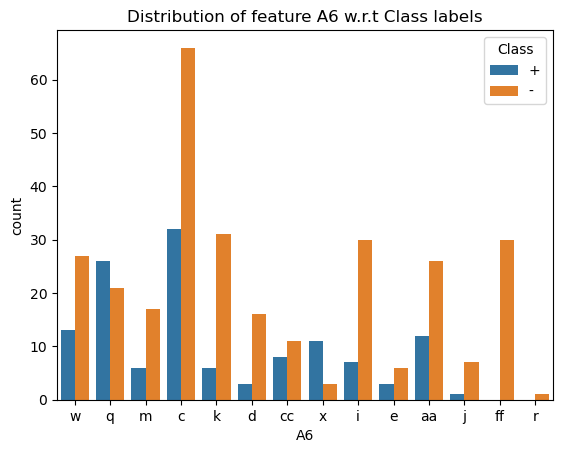

In [23]:
# A6
sns.countplot(x='A6', data=df)
plt.title('Distribution of feature A6')
plt.show()
sns.countplot(x='A6', hue='Class', data=df)
plt.title('Distribution of feature A6 w.r.t Class labels')
plt.show()

### Feature Distribution Analysis(Many Categories)
Pie charts are not suitable for categorical features with many values. Count plots are used to analyze these features.Feature A6 and A7 are analyzed using countplot and their overall distribution is almost similar as class based distribution.

In [24]:
def plot_histogram(feat):
    sns.histplot(x=feat, data=df, kde=True)
    plt.title(f'Distribution of {feat}')
    
    plt.tight_layout()
    plt.show()

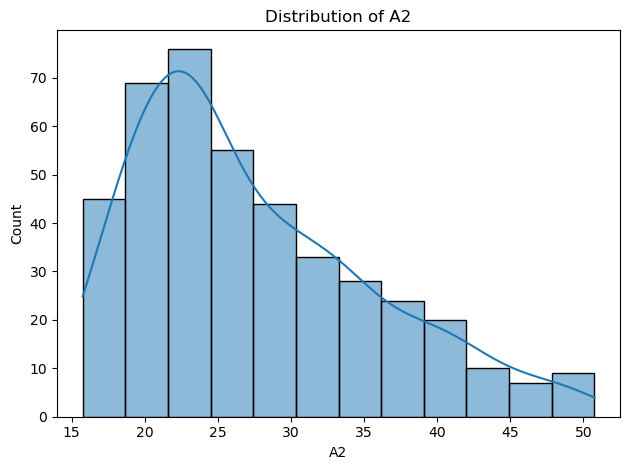

In [25]:
plot_histogram('A2')

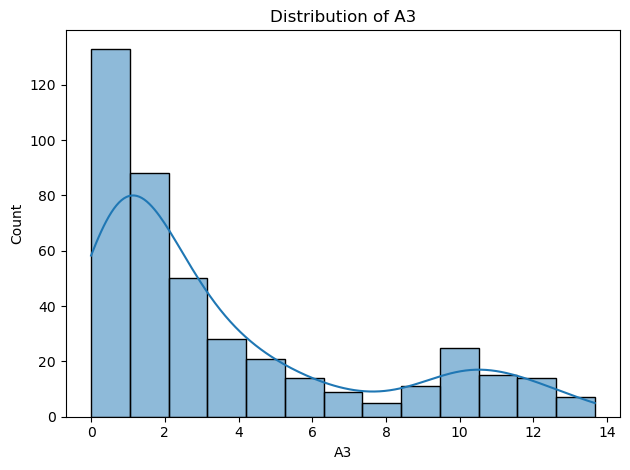

In [26]:
plot_histogram('A3')

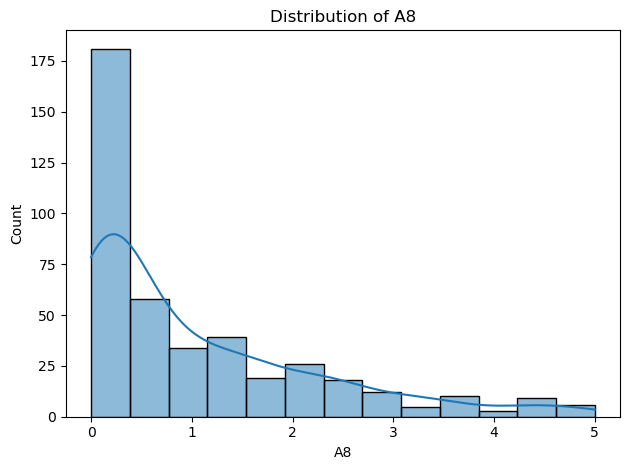

In [27]:
plot_histogram('A8')

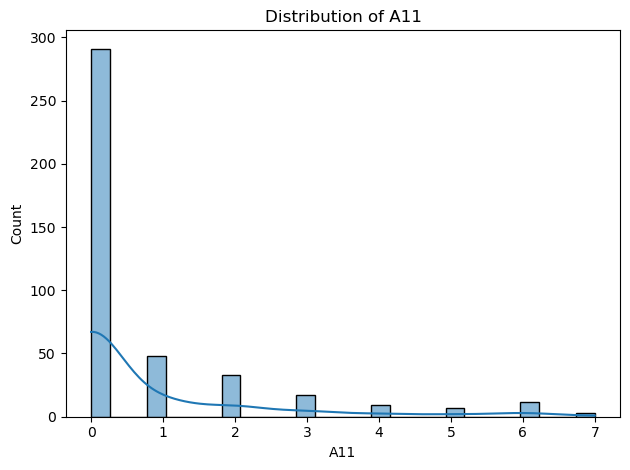

In [28]:
plot_histogram('A11')

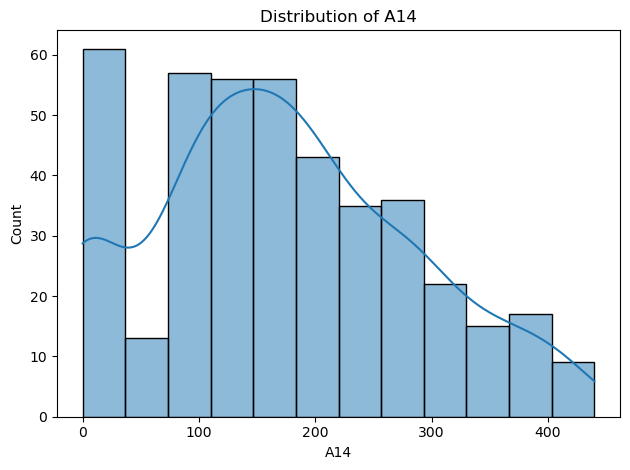

In [29]:
plot_histogram('A14')

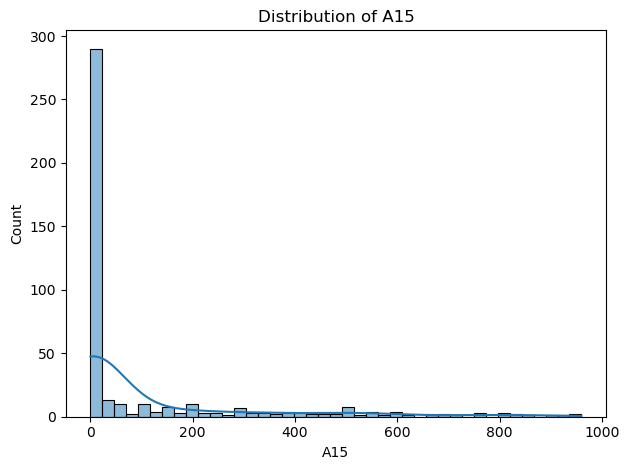

In [30]:
plot_histogram('A15')

### Histograms for Numerical Features
Histograms are used to analyzed numerical features in the data. The interesting fact to note here is that all numerical features except A2 have most of the values near zero and also none of these features are normally distributed.

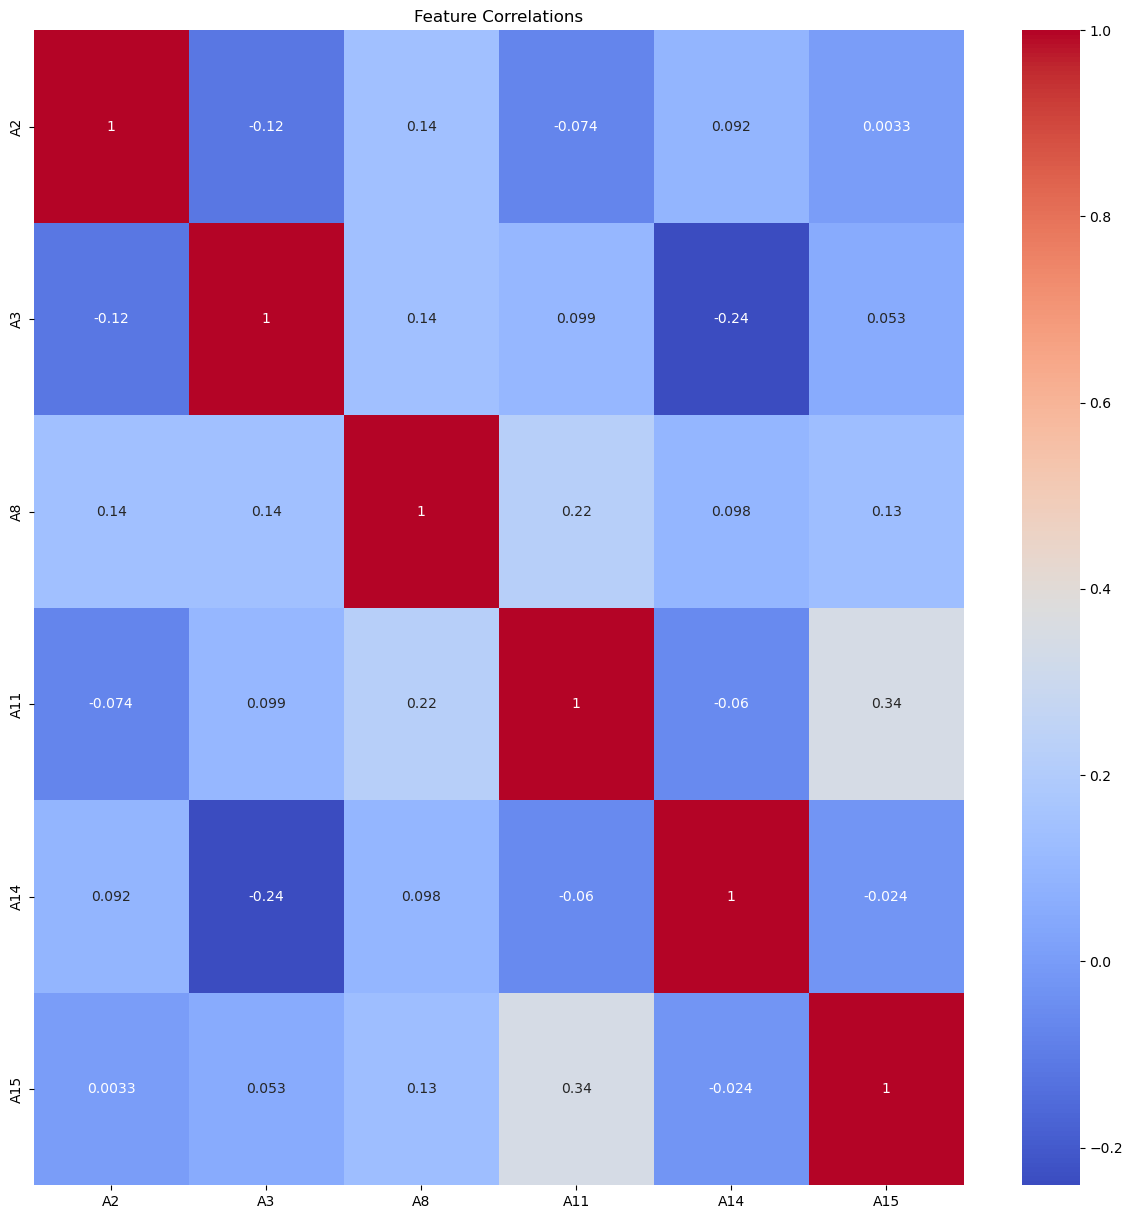

In [31]:
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Feature Correlations')
plt.show()

### Correlation of  Features
We analyzed correlation among features using heatmap. The most correlated features are A11 and A15 as we also noted in previous analysis that these two features are important to distinguish the classes. A11 and A8 are also correlated.The least correlated features are A14 and A3.

In [32]:
def label_permute_compare(ytdf,yp,n=2):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
    # Transform categorical data to numeric
    n=len(np.unique(ytdf))
    le = LabelEncoder()
    label_transformed=le.fit_transform(ytdf)

    # Generate all possible permutation of 0,1,2,3,4 labels
    n=len(set(yp))
    labels=[i for i in range(n)]
    label_perms=list(permutations(labels, n))

    # Store original indices
    original_indicies=[]
    for i in labels:
        original_indicies.append(np.where(yp==i)[0])

    # Calculate max accuracy
    max_acc=0
    best_perm=None
    for label_perm in label_perms:
        yp_temp=yp.copy()
        for i in range(len(label_perm)):
            yp_temp[original_indicies[i]]=label_perm[i]
        acc=accuracy_score(label_transformed,yp_temp)
        if(acc>max_acc):
            max_acc=acc
            best_perm=yp_temp
    return best_perm,max_acc

### Label Encoding
Multiple clustering techniques will be used to check the performance of each of this dataset and select the best one. Since clustering algorithm that will be used in this project require features to be numerical so all categorical features will be converted to numerical features.
Label encode is used to convert all categorical features. Label encoder assigns integer values to categories in each column.

In [33]:
cols=df.columns
for i,col in enumerate(cols):
    if types[i]=='object':
        encoder=LabelEncoder()
        df[col]=encoder.fit_transform(df[col])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,1,30.83,0.000,0,0,12,7,1.25,1,1,1,0,0,202.0,0,0
2,0,24.50,0.500,0,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,0,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,0,0,12,7,1.71,1,0,0,0,2,120.0,0,0
5,1,32.08,4.000,0,0,9,7,2.50,1,0,0,1,0,360.0,0,0


## Model Selection, Results & Analysis

### Dimensionality Reduction
Dimensions in the data under consideration are not very big that dimensionality reduction is required to reduce the complexity. But still it is necessary to check whether dimensionality reduction effects the accuracy of the models or not. 

### Unsupervised Machine Learning Techniques
Three unsupervised techniques will be paired with dimensionality reduction to find the best model for the dataset under consideration. Unsupervised techniques used are:
1. KMeans Clustering
2. Hierarchical Clustering
3. Non-negative Matrix Factorization

and PCA will be used for dimensionality reduction.

(420, 2)
(420, 3)
(420, 4)
(420, 5)
(420, 6)
(420, 7)
(420, 8)
(420, 9)
(420, 10)
(420, 11)
(420, 12)
(420, 13)
(420, 14)
(420, 15)


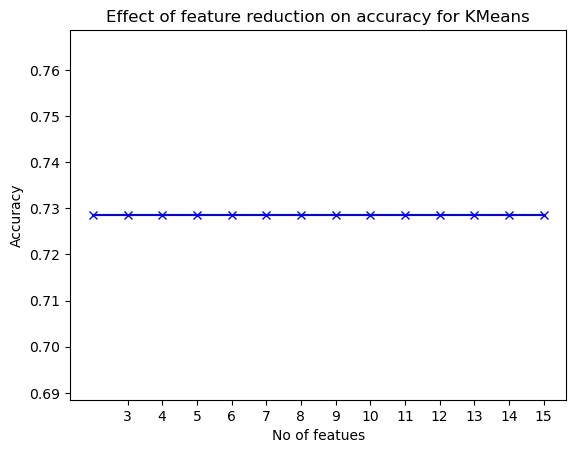

In [34]:
acc=[]
dims=[]
arr = df.values

for p in range(2,arr.shape[1]):
    pca = PCA(n_components=p)
    arr_reduced=pca.fit_transform(arr)
    print(arr_reduced.shape)
    kmeans = KMeans(n_clusters=2, random_state=0).fit(arr_reduced)
    predictions=kmeans.labels_
    best_perm,max_acc = label_permute_compare(df['Class'].values,predictions)
    acc.append(max_acc)
    dims.append(p)
    
plt.plot(dims, acc, 'bx-')
plt.xlabel('No of featues')
plt.ylabel('Accuracy')
plt.xticks(list(range(3,arr.shape[1])))
plt.title('Effect of feature reduction on accuracy for KMeans')
plt.show()

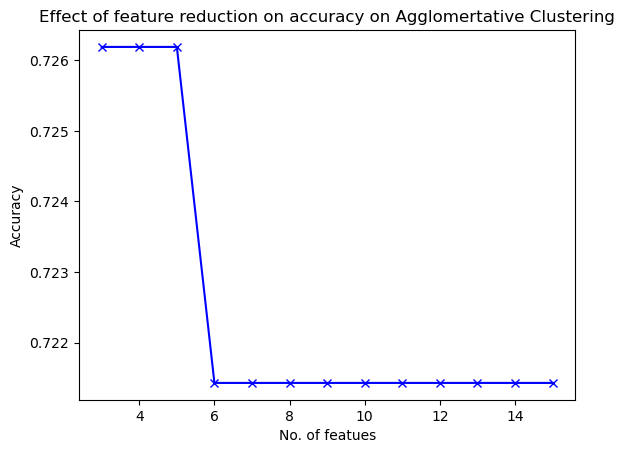

In [35]:
acc=[]
dims=[]

for p in range(3,arr.shape[1]):
    pca = PCA(n_components=p)
    arr_reduced=pca.fit_transform(arr)
    model=AgglomerativeClustering(2,linkage='ward').fit(arr_reduced)
    predictions=model.labels_
    best_perm,max_acc = label_permute_compare(df['Class'].values,predictions)
    dims.append(p)
    acc.append(max_acc)

plt.plot(dims, acc, 'bx-')
plt.xlabel('No. of featues')
plt.ylabel('Accuracy')
plt.title('Effect of feature reduction on accuracy on Agglomertative Clustering')
plt.show()

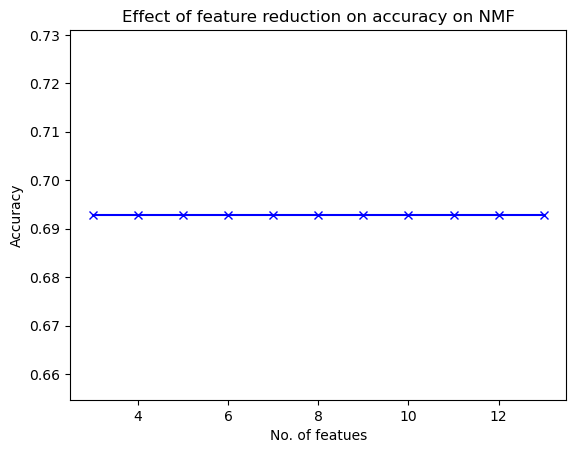

In [36]:
acc=[]
dims=[]

for p in range(3,arr.shape[1]-2):
    pca = PCA(n_components=p)
    arr_reduced=pca.fit_transform(arr)
    nmf = NMF(n_components=2)
    nmf_pred = nmf.fit_transform(arr)
    predictions = np.argmax(nmf_pred, axis=1)
    best_perm,max_acc = label_permute_compare(df[['Class']].values,predictions)
    dims.append(p)
    acc.append(max_acc)

plt.plot(dims, acc, 'bx-')
plt.xlabel('No. of featues')
plt.ylabel('Accuracy')
plt.title('Effect of feature reduction on accuracy on NMF')
plt.show()

As it is  clear from the results that the performance of KMeans clustering is best among all the techniques. PCA has no effect on the results in case of KMeans clustering and NMF. Reduced features are giving better results in case of Agglomerative clustering but these results are still not better than the KMeans. 
So KMeans clustering will be applied on all the features in the dataset for final analysis.

(420, 16)


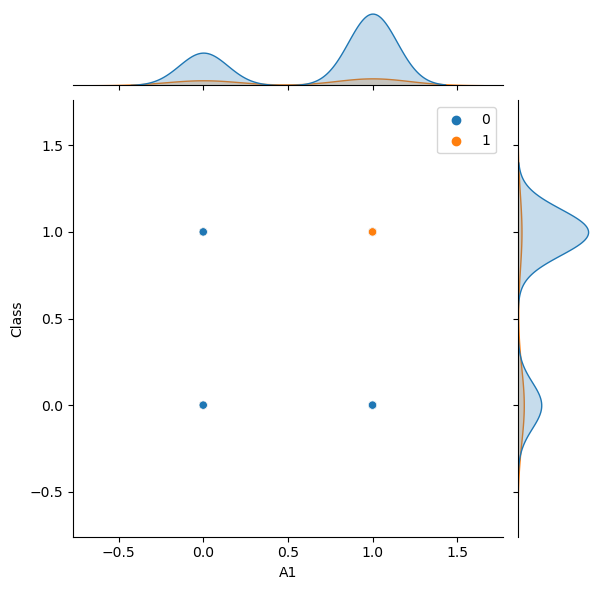

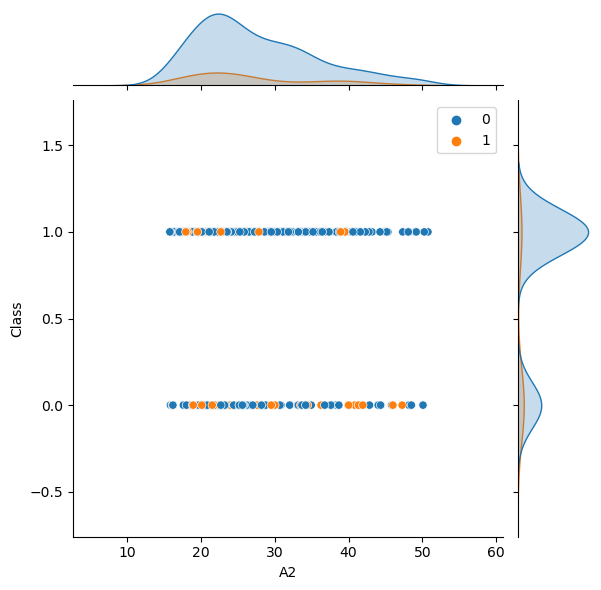

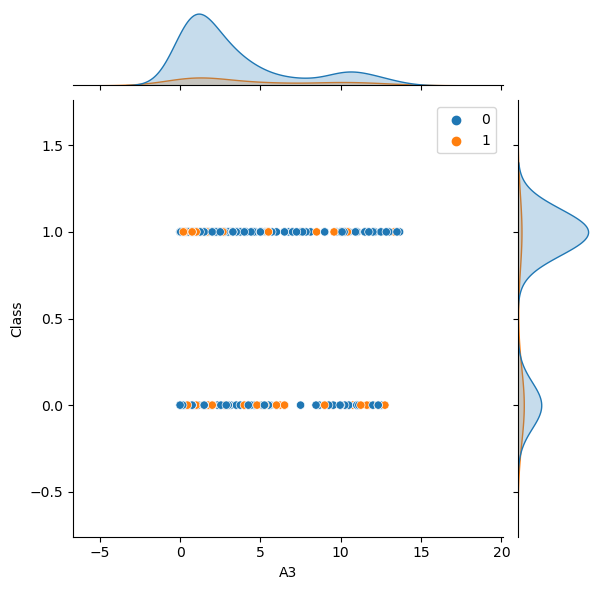

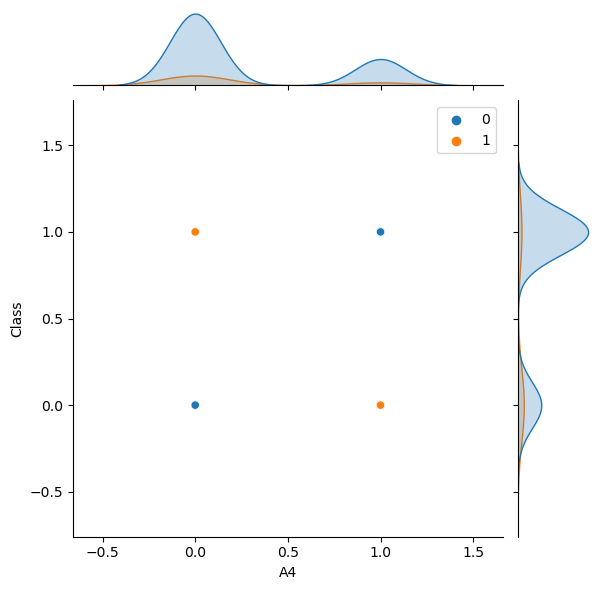

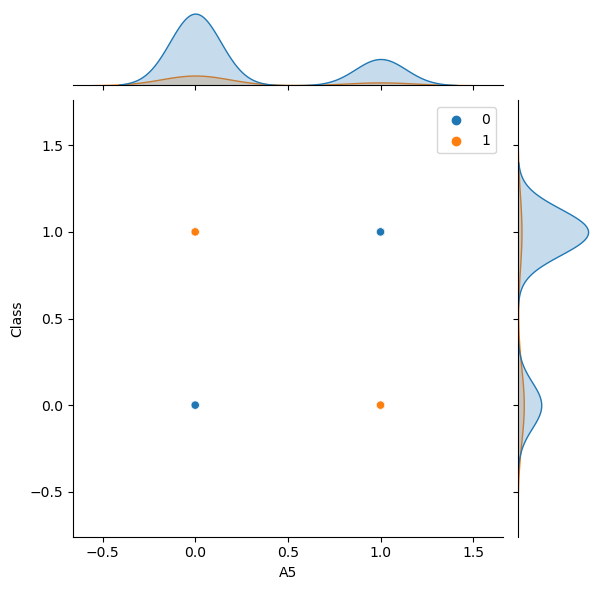

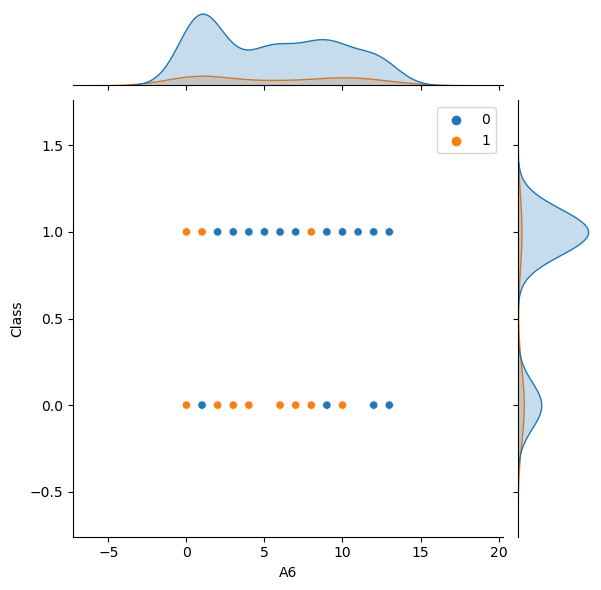

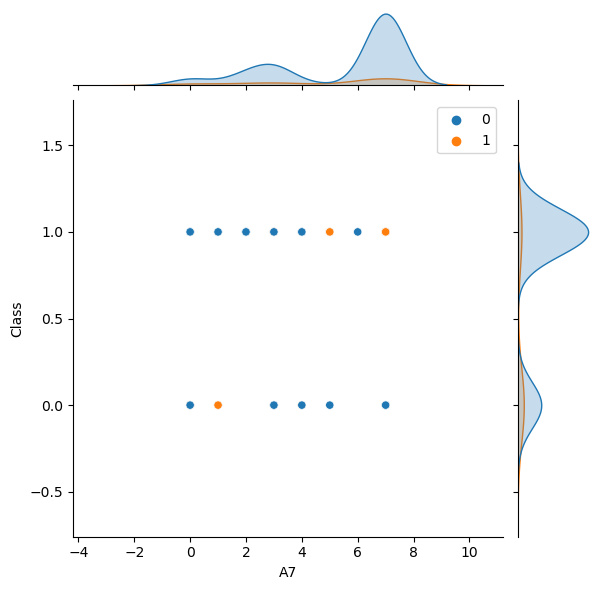

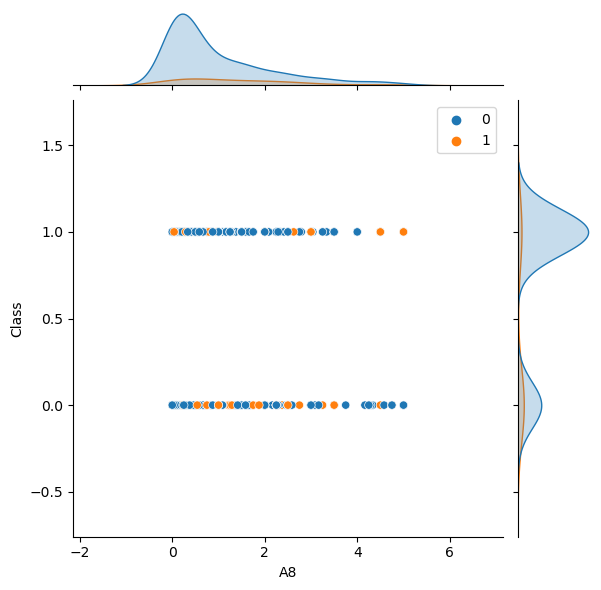

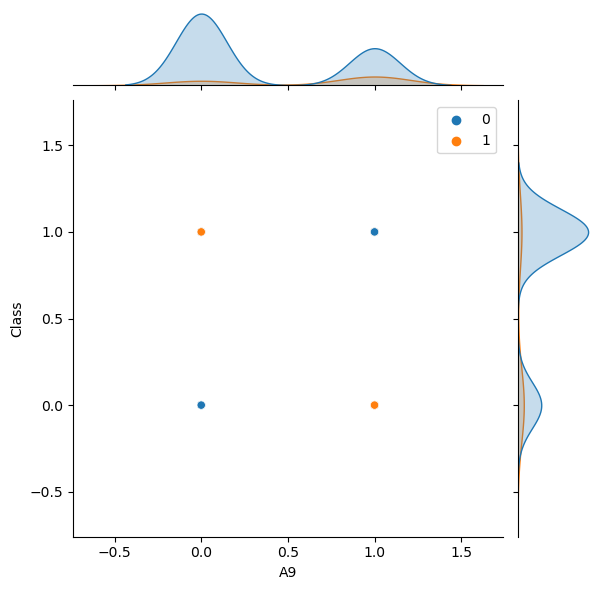

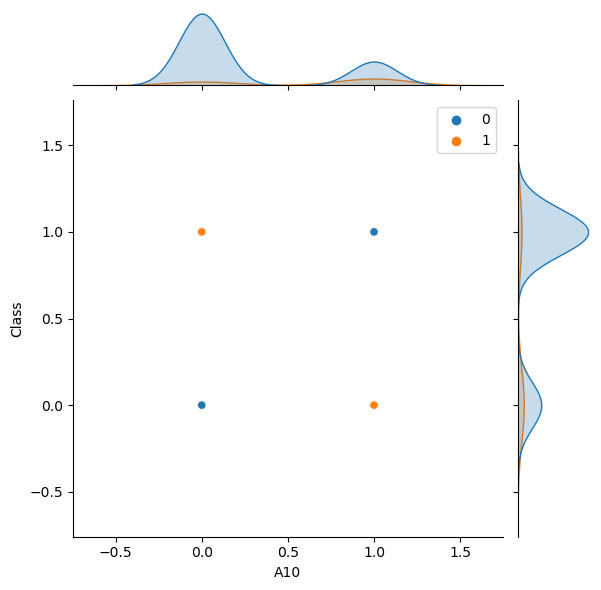

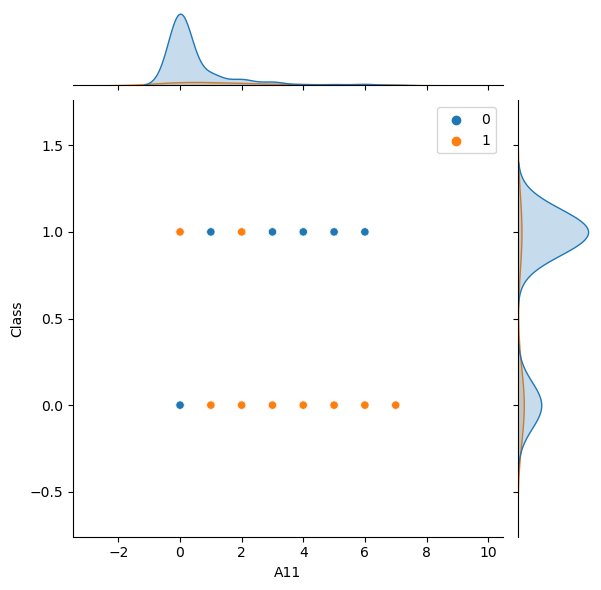

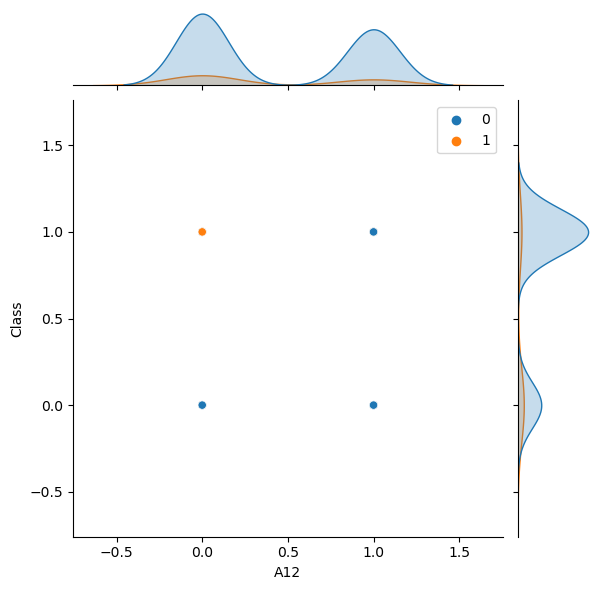

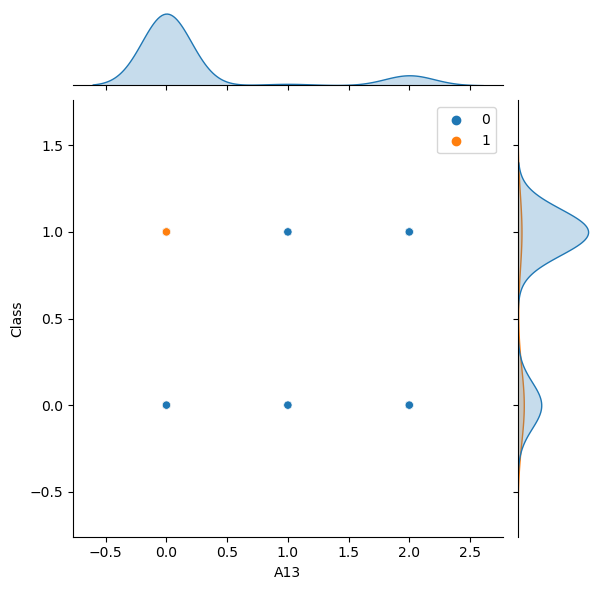

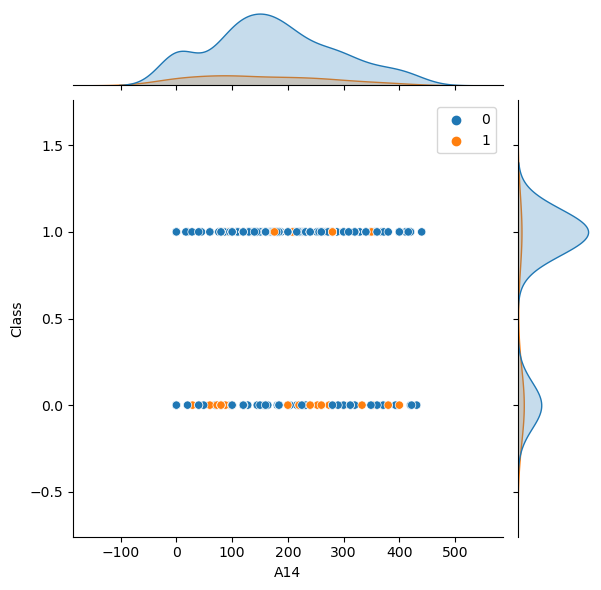

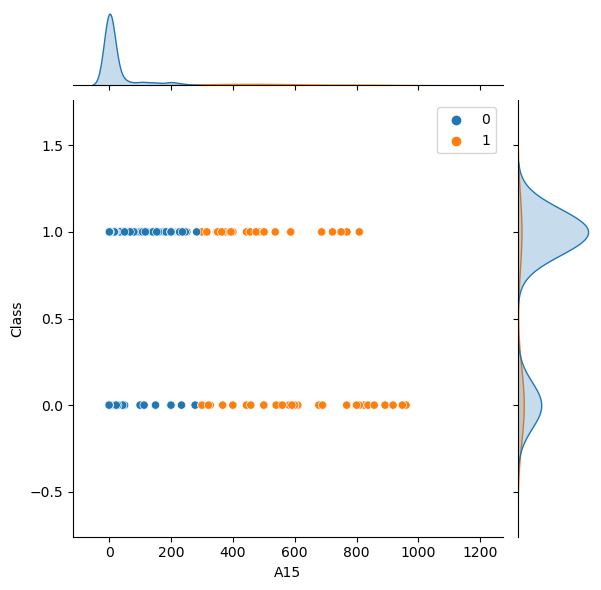

In [37]:
arr = df.values
print(arr.shape)
arr=arr[:,0:arr.shape[1]-1]
kmeans = KMeans(n_clusters=2, random_state=0).fit(arr_reduced)
predictions=kmeans.labels_
best_perm=predictions
df['Clusters']=best_perm
for col in df.columns:
    if col!='Class' and col!='Clusters':
        sns.jointplot(data=df, x=col, y="Class",hue=best_perm )#,kind='kde'
        plt.show()

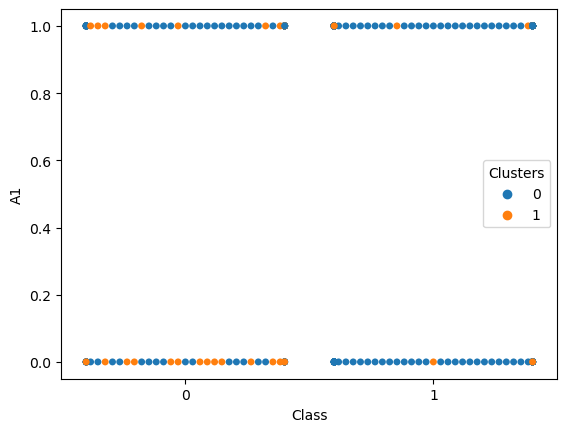

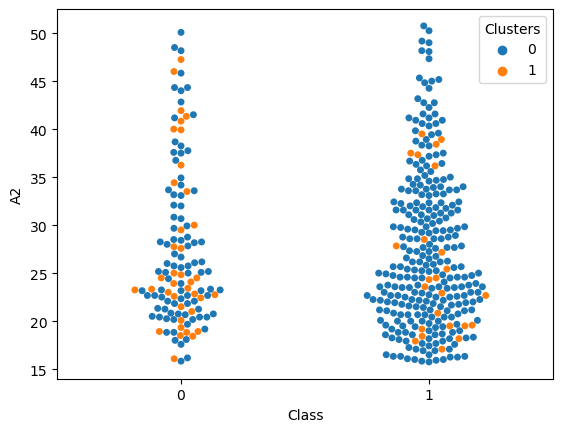

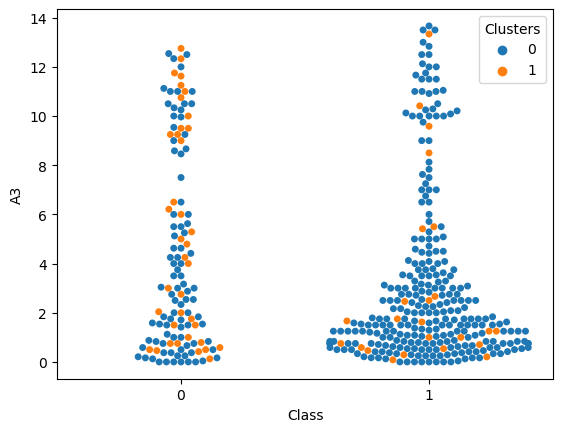

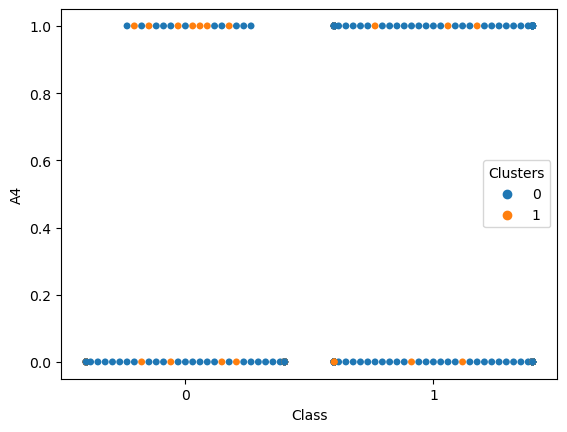

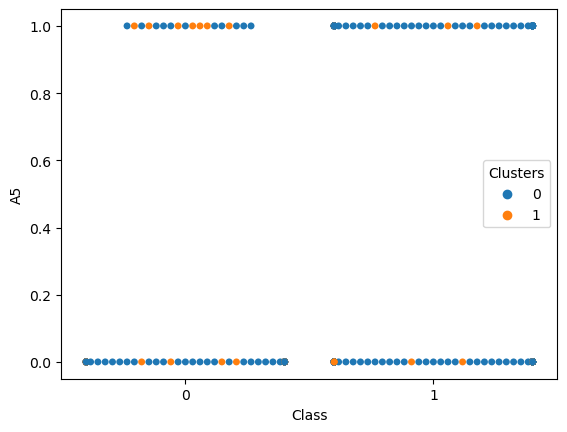

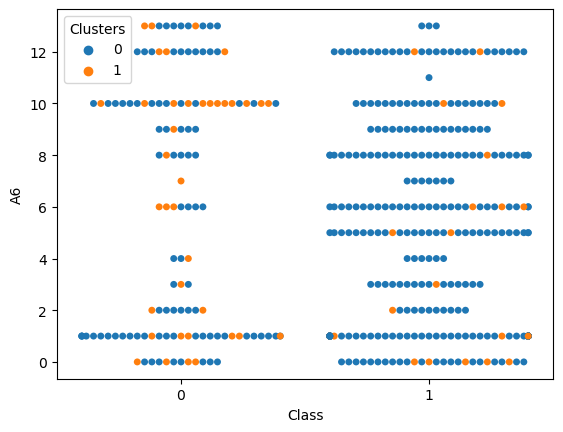

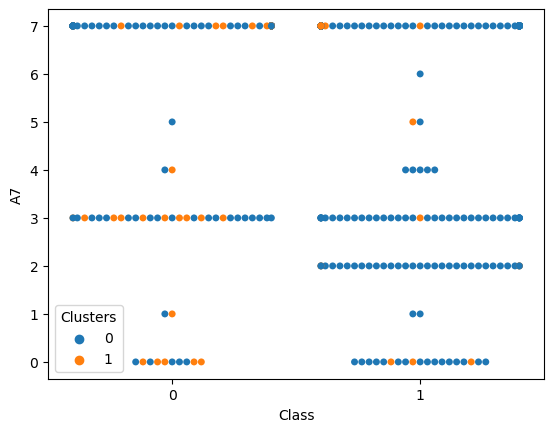

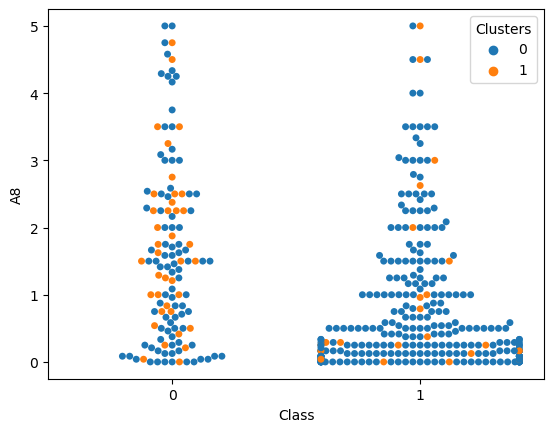

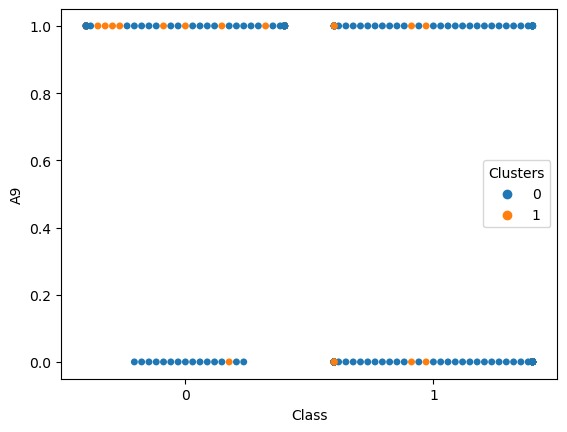

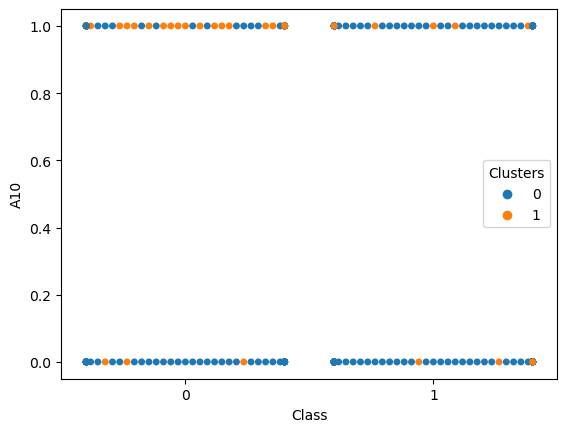

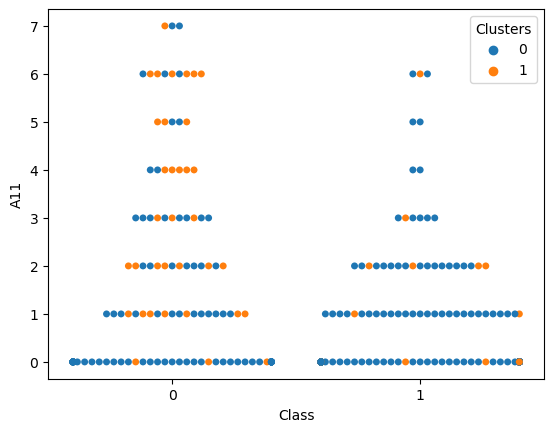

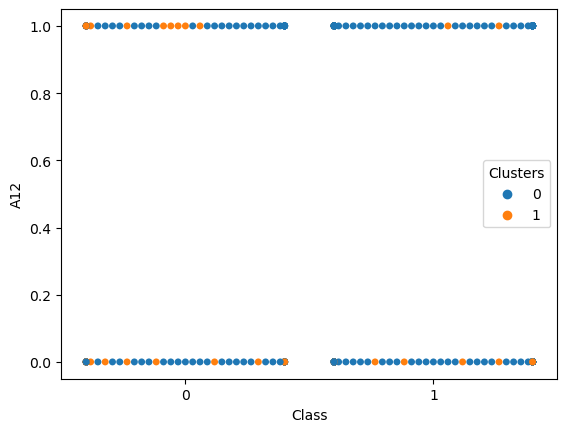

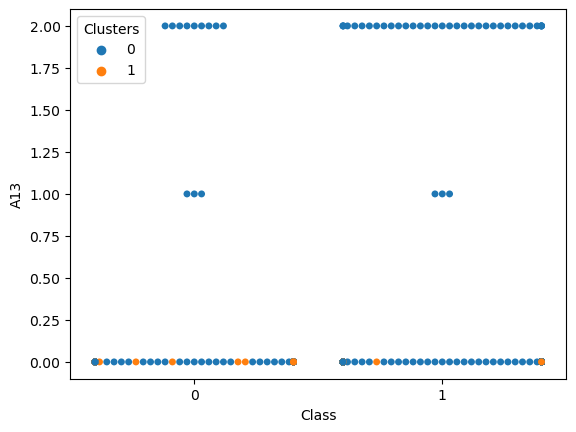

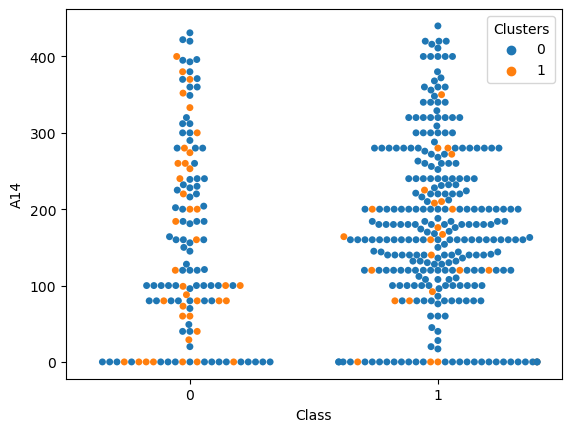

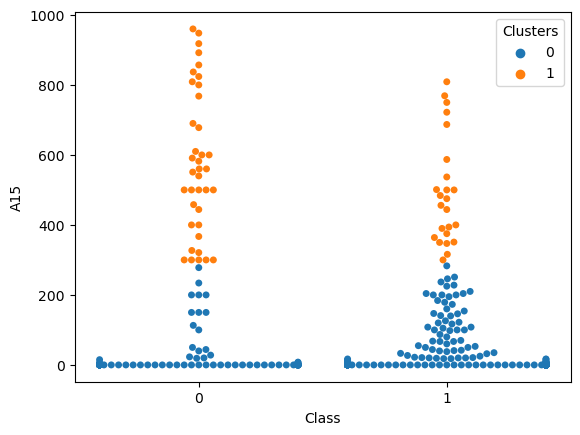

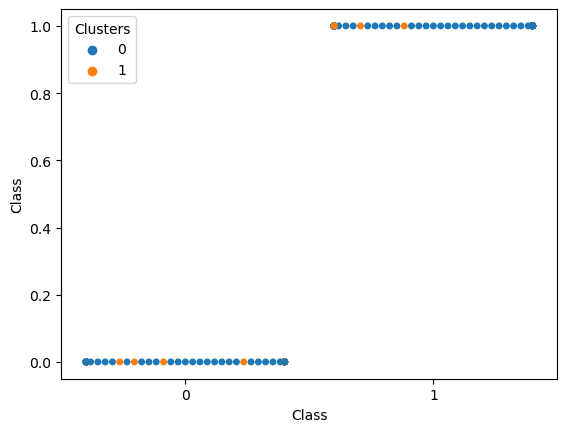

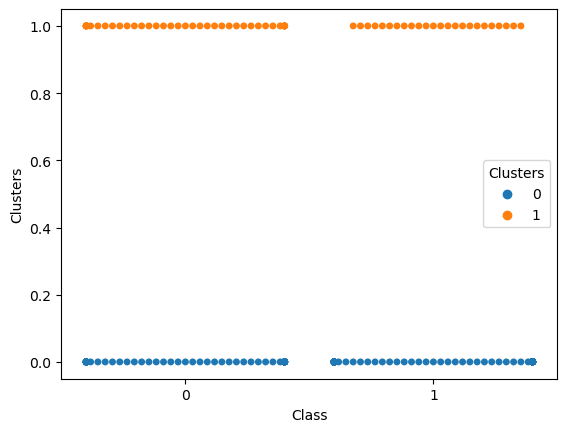

In [38]:
for col in df.columns:
    sns.swarmplot(data=df, x="Class", y=col,hue="Clusters")
    plt.show()

It is clear from the plots above that our clusters are well defined and isolated on feature A15. It was stated earlier in analysis that 'A15' feature was the feature where actual class label were distinct. Results on other important features like A11 are also very good.

### Performance Evaluation Metrics
Since actual labels are mostly not available in case of unsupervised learning but we have them in this dataset. We will also use performance evaluation metrics that do not use true labels.
#### Metrics with True Labels:
1. <b>Accuracy</b>
   1. range (0-1)
   2. higher value is better
2. <b>Adjusted rand index</b>
   1. range (0-1)
   2. higher value is better
3. <b>Silhouette score</b>
   1. range (0-1)
   2. higher value is better
4. <b>Calinski Harabasz score</b>
   1. range (0-)
   2. higher value is better
    

In [39]:
print("Adjusted rand index is ",metrics.rand_score(df['Class'], df['Clusters']))

Adjusted rand index is  0.603545857483805


In [40]:
print("silhouette score is ",metrics.silhouette_score(arr, df['Clusters']))

silhouette score is  0.6771239121678041


In [41]:
print("Calinski Harabasz score is ",metrics.calinski_harabasz_score(arr, df['Clusters']))

Calinski Harabasz score is  685.9990795827676


Since classes in data were not isolated and they were overlapping in most of the cases so values for our evaluation metrics indicates that performance of our model is good for the dataset under consideration.

## Discussion & Conclusion

The swarm plots generated above provide valuable insights into the distribution of data points across different classes and clusters for each feature in the dataset. These visualizations allow us to observe the spread and density of data points, helping us understand the relationships between features, classes, and clusters. Specifically, the swarm plots highlight how individual data points are distributed across both class labels '+' and '-', as well as the clusters identified by the KMeans algorithm.

Furthermore, the swarm plots illustrate how certain features may have a significant impact on the separation of clusters, whereas others may overlap more. This insight can be valuable in understanding the predictive power of specific features in differentiating between credit card approval outcomes.

### Learning and Takeaways
1. Unsupervised Learning Utility: The combination of unsupervised learning techniques, such as KMeans clustering, with visualizations like swarm plots, offers a powerful approach to gain insights from complex datasets. It enables us to uncover patterns, relationships, and clusters within the data even without labeled target variables.

2. Feature Importance: Through the swarm plots, we can identify features that exhibit clear separation between classes and clusters. These features could be pivotal in predicting credit card approval outcomes. On the other hand, features that overlap between classes may have less predictive value.

3. Dimensionality Reduction Impact: Our analysis included PCA for dimensionality reduction. While the impact of PCA on the KMeans clustering results was relatively minimal, it's important to experiment with different reduction techniques to see if they significantly impact the clustering outcomes.

### Suggestions for Improvement
1. Data Preprocessing: Exploring advanced techniques for missing value imputation and outlier detection could potentially improve the clustering results. Different imputation methods and outlier handling strategies could lead to better model performance.

2. Algorithm Exploration: While KMeans performed well in this case, experimenting with other clustering algorithms such as hierarchical clustering, DBSCAN, or Gaussian Mixture Models could yield insights about different cluster structures.

3. Hyperparameter Tuning: Fine-tuning hyperparameters of the clustering algorithm can have a significant impact on the results. Conducting a thorough grid search to identify the best parameters for the chosen algorithm is recommended.

### Conclusion
In this project, we aimed to predict credit card approval using unsupervised learning techniques. We performed exploratory data analysis, including data cleaning, missing value imputation, and outlier removal. After preparing the data, we applied KMeans clustering along with dimensionality reduction using PCA. The clustering results were evaluated using various metrics, including silhouette score, adjusted rand index, and Calinski Harabasz score. The swarm plots provided a visual representation of how data points were distributed across classes and clusters for different features.

In conclusion, the combination of unsupervised learning techniques, visualizations, and discussion of key takeaways and suggestions for improvement helped us gain insights into the credit card approval prediction task. As the field of machine learning evolves, continued experimentation and improvement in data preprocessing and modeling techniques can further enhance the accuracy and reliability of such predictive models.